In [3]:
# 📦 Paso 1: Cargar librerías necesarias
import json
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [4]:
# 🗂️ Paso 2: Cargar etiquetas desde el JSON
with open("resultados_dientes.json") as f:
    data = json.load(f)

# Convertir a listas
imagenes = []
etiquetas = []

for nombre, atributos in data.items():
    path = os.path.join("src", nombre)  # Ruta relativa a las imágenes
    if os.path.exists(path):
        imagenes.append(path)
        etiquetas.append(atributos["salud"])


In [5]:
# 🖼️ Paso 3: Cargar imágenes y convertir a arrays
X = []
for path in imagenes:
    img = load_img(path, target_size=(128, 128))  # Redimensionamos
    img_array = img_to_array(img) / 255.0         # Normalizamos
    X.append(img_array)

X = np.array(X)
y = np.array(etiquetas)
print(f"Imágenes cargadas: {X.shape}, Etiquetas: {y.shape}")


Imágenes cargadas: (1152, 128, 128, 3), Etiquetas: (1152,)


In [6]:
# ✂️ Paso 4: Dividir en entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# 🧠 Paso 5: Definir la CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Para clasificación binaria
])


/home/mike/Desktop/codes/projects/AI_PRJ/TrueDent-AI/virt/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1750143831.663669    5613 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14293 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.9


In [9]:
# ⚙️ Paso 6: Compilar y entrenar
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.8908 - loss: 0.3127 - val_accuracy: 0.8355 - val_loss: 0.3745
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9831 - loss: 0.0639 - val_accuracy: 0.8615 - val_loss: 0.3554
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9971 - loss: 0.0323 - val_accuracy: 0.8312 - val_loss: 0.5195
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9913 - loss: 0.0314 - val_accuracy: 0.8398 - val_loss: 0.4585
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9900 - loss: 0.0358 - val_accuracy: 0.8312 - val_loss: 0.4431
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9885 - loss: 0.0375 - val_accuracy: 0.8355 - val_loss: 0.4456
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9887 - loss: 0.0396 - val_accuracy: 0.8485 - val_loss: 0.3885
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 0.

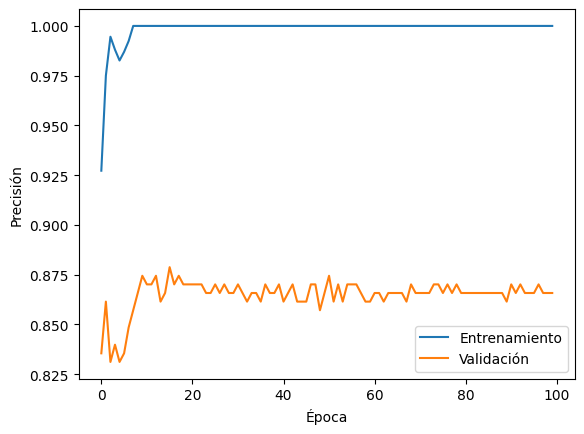

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8593 - loss: 0.6680 
Precisión final: 0.87


In [10]:
# 📈 Paso 7: Evaluar y visualizar resultados
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Evaluación final
loss, acc = model.evaluate(X_test, y_test)
print(f"Precisión final: {acc:.2f}")


In [ ]:
import os

model.save("../final_model/TrueDent_v2.h5")
print("Modelo guardado en formato .h5 correctamente.")

Modelo guardado en formato .h5 correctamente.
